In [1]:
# Compare 2D variables from two Model simulations and CERES
import cartopy.crs as ccrs
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
import numpy as np
import pickle
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import matplotlib.tri as tri
import sys
sys.setrecursionlimit(9000)

In [2]:
# Change this part
Year  = 2008
Month = 10
Day   = 1
Hour  = 0
ngridx = 720
ngridy = 360
HisFlag = 'h2' # This output is for daily average
# Walter's INCITE runs
INCITE_Case = 'NXY_32x1.DX_1600.L_125_115.DT_2e0'
INCITE_Case2 = 'NXY_32x1.DX_200.L_125_115.DT_5e-1'
Date  = str(Year)+'-'+str("{0:0=2d}".format(Month))+'-'+str("{0:0=2d}".format(Day))+'-'+str("{0:0=5d}".format(Hour))
Date3 = str(Year)+'-'+str("{0:0=2d}".format(Month))+'-'+str("{0:0=2d}".format(Day))

In [3]:
# Model output path and filename
PATH = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
FNAME = 'Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.'+HisFlag+'.'+Date+'.nc'
PATH2 = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
FNAME2 = 'Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.'+HisFlag+'.'+Date+'.nc'
# CERES data
PATH_CERES = '/scratch1/07088/tg863871/CERES/'
FNAME_CERES = 'CERES_SYN1deg-Day_Terra-Aqua-MODIS_Ed4.1_Subset_20081001-20081130.nc'
# Walter's INCITE runs
PATH3 = '/scratch1/07088/tg863871/INCITE2020/INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case+'.2008-10-01/'
FNAME3 = 'INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case+'.2008-10-01.eam.h1.'+Date3+'-00000.remap_180x360.nc'
PATH4 = '/scratch1/07088/tg863871/INCITE2020/INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case2+'.2008-10-01/'
FNAME4 = 'INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case2+'.2008-10-01.eam.h1.'+Date3+'-00000.remap_180x360.nc'

In [4]:
# Read data
FILE_CERES = nc.Dataset(PATH_CERES+FNAME_CERES, mode = 'r')
FILE = nc.Dataset(PATH+FNAME, mode = 'r')
FILE2 = nc.Dataset(PATH2+FNAME2, mode = 'r')
FILE3 = nc.Dataset(PATH3+FNAME3, mode = 'r')
FILE4 = nc.Dataset(PATH4+FNAME4, mode = 'r')
print(PATH+FNAME)

/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.h2.2008-10-01-00000.nc


In [15]:
# Read coordinates
lon_CERES  = FILE_CERES.variables['lon'] # 360
lat_CERES  = FILE_CERES.variables['lat'] # 180
time_CERES = FILE_CERES.variables['time']
lon = FILE.variables['lon'] # 6144 
lat = FILE.variables['lat'] # 6144
lon3 = FILE3.variables['lon'] # 360
lat3 = FILE3.variables['lat'] # 180
lat_CERES.shape

(180,)

In [6]:
# Read 2D variables
FSNTOA    = FILE.variables['FSNTOA']
FSNTOA2   = FILE2.variables['FSNTOA']
FSNTOA3   = FILE3.variables['FSNTOA']
FSNTOA4   = FILE4.variables['FSNTOA']
FLUT      = FILE.variables['FLNT'] # Note here I am using FLNT to replace FLUP
FLUT2     = FILE2.variables['FLNT'] 
np.squeeze(FILE3.FLUT.isel(time=it).values)
FLUT3     = FILE3.variables['FLUT']
FLUT4     = FILE4.variables['FLUT']
toa_sw_all_daily = FILE_CERES.variables['toa_sw_all_daily']
toa_lw_all_daily = FILE_CERES.variables['toa_lw_all_daily']
toa_solar_all_daily = FILE_CERES.variables['toa_solar_all_daily']
fsntoa_obs      = toa_solar_all_daily[Day-1,:,:]-toa_sw_all_daily[Day-1,:,:]
toa_lw_obs      = toa_lw_all_daily[Day-1,:,:]
FSNTOA.shape
fsntoa_obs.shape

/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  del sys.path[0]
/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  del sys.path[0]
/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  
/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  


(180, 360)

In [9]:
# Interpolate Model results to CERES grid
xi = lon_CERES[:]
yi = lat_CERES[:]
Xi, Yi = np.meshgrid(lon_CERES, lat_CERES)
Xi_INCITE, Yi_INCITE = np.meshgrid(lon3, lat3)
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(lon[:], lat[:])
interpolator = tri.LinearTriInterpolator(triang, FSNTOA[1,:])
FSNTOAi = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, FSNTOA2[1,:])
FSNTOA2i = interpolator(Xi, Yi)
triang = tri.Triangulation(lon3[:], lat3[:])
interpolator = tri.LinearTriInterpolator(triang, FSNTOA3[1,:])
FSNTOA3i = interpolator(Xi_INCITE, Yi_INCITE)
interpolator = tri.LinearTriInterpolator(triang, FSNTOA4[1,:])
FSNTOA4i = interpolator(Xi_INCITE, Yi_INCITE)
interpolator = tri.LinearTriInterpolator(triang, FLUT[1,:])
FLUTi = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, FLUT2[1,:])
FLUT2i = interpolator(Xi, Yi)

minval = min(FLUT[1,:])
maxval = max(FLUT[1,:])
cmin = minval
cmax = maxval
print(cmin,cmax)

ValueError: x and y must be equal-length 1-D arrays

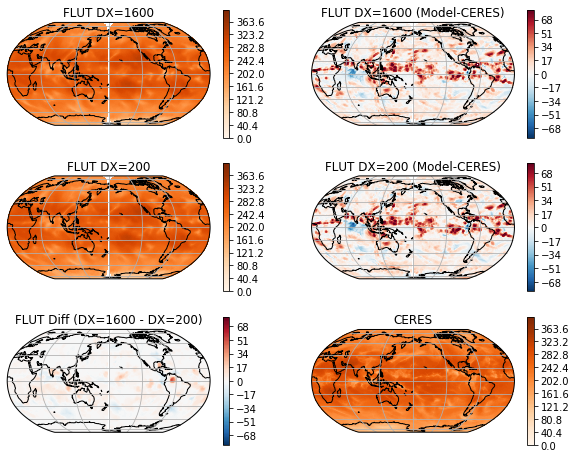

In [34]:
# Compare the FLUT
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
levels = np.linspace(0, 400, 100)
levels2 = np.linspace(-80.0, 80.0, 161)

#-- add coastlines, country border lines, and grid lines
ax1 = fig.add_subplot(3,2,1, projection=ccrs.Robinson(central_longitude=180.0))
#-- choose map projection
ax1.set_global()
ax1.coastlines()
ax1.gridlines()
cntr1=ax1.contourf(xi, yi, FLUTi, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr1, ax=ax1)
ax1.set_title('FLUT DX=1600')
ax12 = fig.add_subplot(3,2,2, projection=ccrs.Robinson(central_longitude=180.0))
ax12.coastlines()
ax12.gridlines()
cntr12=ax12.contourf(xi, yi, FLUTi-toa_lw_obs, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr12, ax=ax12)
ax12.set_title('FLUT DX=1600 (Model-CERES)')
ax2 = fig.add_subplot(3,2,3, projection=ccrs.Robinson(central_longitude=180.0))
ax2.set_global()
#-- add coastlines, country border lines, and grid lines
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, FLUT2i, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr2, ax=ax2)
ax2.set_title('FLUT DX=200')
ax22 = fig.add_subplot(3,2,4, projection=ccrs.Robinson(central_longitude=180.0))
ax22.coastlines()
ax22.gridlines()
cntr22=ax22.contourf(xi, yi, FLUT2i-toa_lw_obs, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr22, ax=ax22)
ax22.set_title('FLUT DX=200 (Model-CERES)')
ax3 = fig.add_subplot(3,2,5, projection=ccrs.Robinson(central_longitude=180.0))
ax3.set_global()
#-- add coastlines, country border lines, and grid lines
ax3.coastlines()
ax3.gridlines()
cntr3=ax3.contourf(xi, yi, FLUT2i-FLUTi, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr3, ax=ax3)
ax3.set_title('FLUT Diff (DX=200 - DX=1600)')
ax32 = fig.add_subplot(3,2,6, projection=ccrs.Robinson(central_longitude=180.0))
ax32.coastlines()
ax32.gridlines()
cntr32=ax32.contourf(xi, yi, toa_lw_obs, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree())
fig.colorbar(cntr32, ax=ax32)
ax32.set_title('CERES')
plt.show()

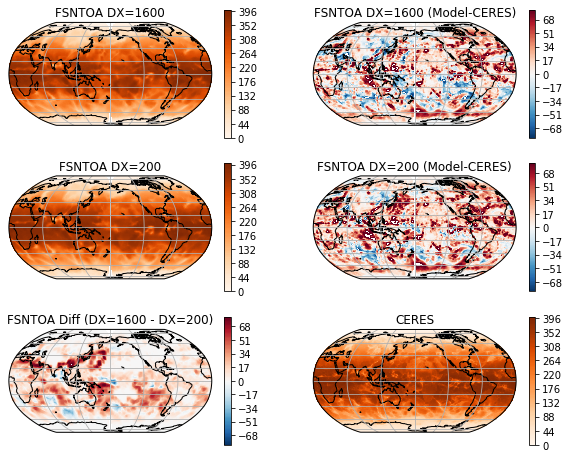

In [35]:
# Compare the FSNTOA
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
levels = np.linspace(0, 400, 101)
levels2 = np.linspace(-80.0, 80.0, 161)

#-- add coastlines, country border lines, and grid lines
ax1 = fig.add_subplot(3,2,1, projection=ccrs.Robinson(central_longitude=180.0))
#-- choose map projection
ax1.set_global()
ax1.coastlines()
ax1.gridlines()
cntr1=ax1.contourf(xi, yi, FSNTOAi, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr1, ax=ax1)
ax1.set_title('FSNTOA DX=1600')
ax12 = fig.add_subplot(3,2,2, projection=ccrs.Robinson(central_longitude=180.0))
ax12.coastlines()
ax12.gridlines()
cntr12=ax12.contourf(xi, yi, FSNTOAi-fsntoa_obs, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr12, ax=ax12)
ax12.set_title('FSNTOA DX=1600 (Model-CERES)')
ax2 = fig.add_subplot(3,2,3, projection=ccrs.Robinson(central_longitude=180.0))
ax2.set_global()
#-- add coastlines, country border lines, and grid lines
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, FSNTOA2i, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr2, ax=ax2)
ax2.set_title('FSNTOA DX=200')
ax22 = fig.add_subplot(3,2,4, projection=ccrs.Robinson(central_longitude=180.0))
ax22.coastlines()
ax22.gridlines()
cntr22=ax22.contourf(xi, yi, FSNTOA2i-fsntoa_obs, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr22, ax=ax22)
ax22.set_title('FSNTOA DX=200 (Model-CERES)')
ax3 = fig.add_subplot(3,2,5, projection=ccrs.Robinson(central_longitude=180.0))
ax3.set_global()
#-- add coastlines, country border lines, and grid lines
ax3.coastlines()
ax3.gridlines()
cntr3=ax3.contourf(xi, yi, FSNTOA2i-FSNTOAi, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr3, ax=ax3)
ax3.set_title('FSNTOA Diff (DX=200 - DX=1600)')
ax32 = fig.add_subplot(3,2,6, projection=ccrs.Robinson(central_longitude=180.0))
ax32.coastlines()
ax32.gridlines()
cntr32=ax32.contourf(xi, yi, fsntoa_obs, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr32, ax=ax32)
ax32.set_title('CERES')
plt.show()